<a href="https://colab.research.google.com/github/fidafebin/fida-febin.k/blob/main/Simple_Linear_Regression_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
from google.colab import files 
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


There are no missing values in the data

In [5]:
data[data.duplicated()]

,Delivery Time,Sorting Time


There are no duplicate valuess

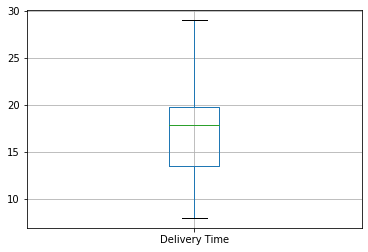

In [8]:
data[['Delivery Time']].boxplot()
plt.show()

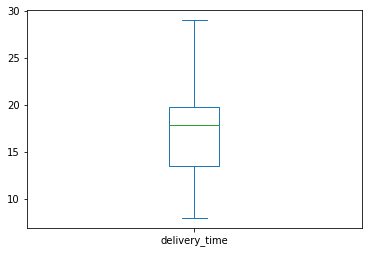

In [11]:
data.columns=['delivery_time','sorting_time']
data.delivery_time.plot(kind='box')

There is no outliers in the data

In [12]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


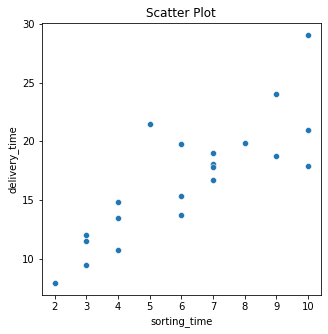

In [13]:
plt.figure(figsize = (5,5))
sns.scatterplot(data['sorting_time'],data['delivery_time'])
plt.title('Scatter Plot')
plt.show()

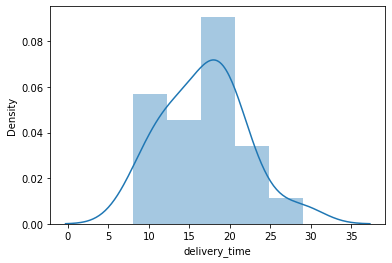

In [15]:
sns.distplot(data['delivery_time'])
plt.show()

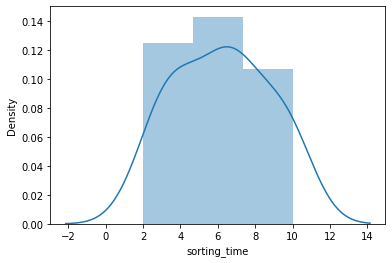

In [16]:
sns.distplot(data['sorting_time'])
plt.show()

In [17]:
data['st_sq']=data.sorting_time**2
data['st_sqrt']=data.sorting_time**0.5
data['st_log']=np.log(data.sorting_time)
data['st_sqrt4']=data.sorting_time**0.4

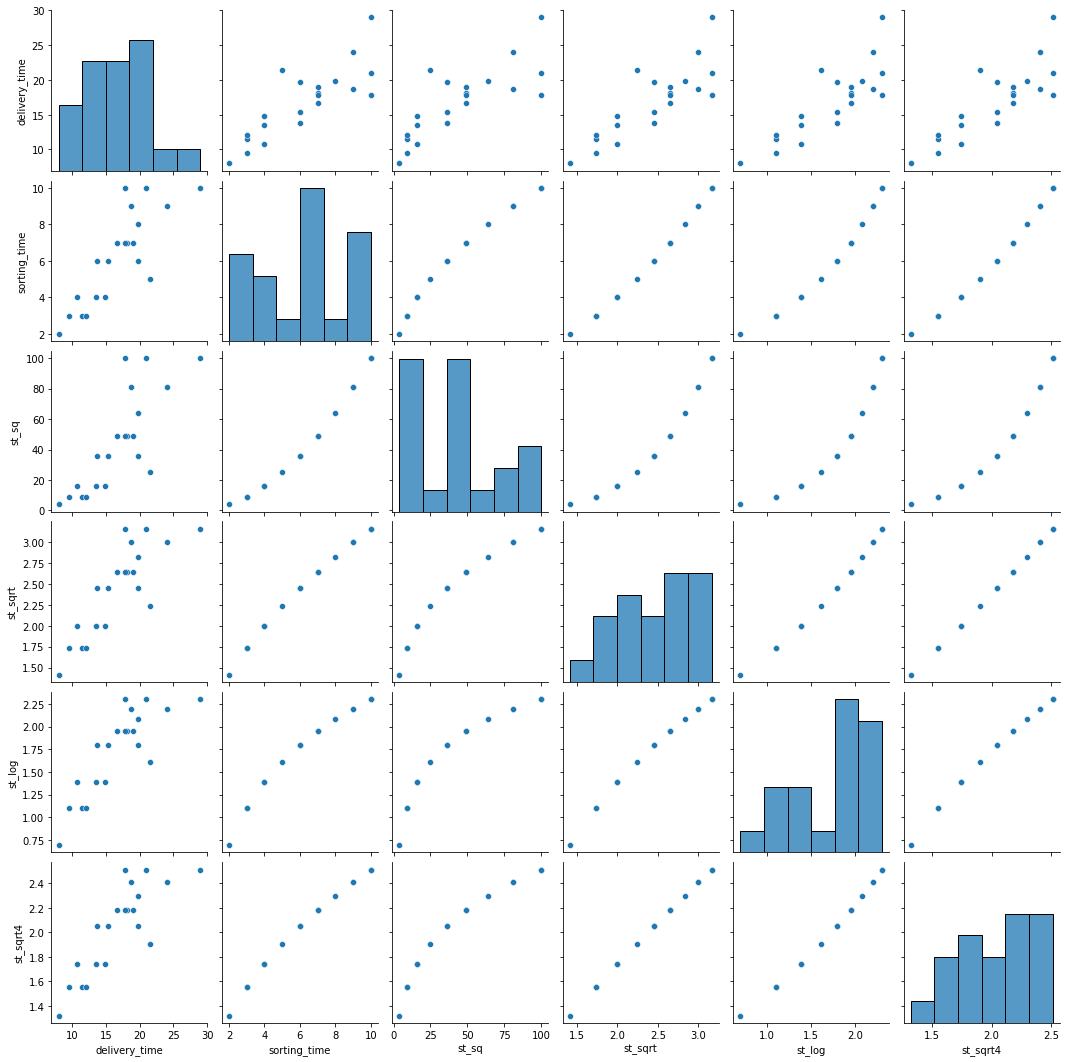

In [20]:
sns.pairplot(data)
plt.show()

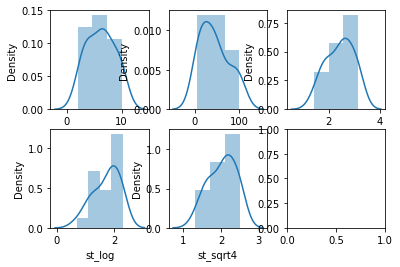

In [22]:
fig, axs=plt.subplots(2,3)
sns.distplot(data['sorting_time'],ax=axs[0,0])
sns.distplot(data['st_sq'],ax=axs[0,1])
sns.distplot(data['st_sqrt'],ax=axs[0,2])
sns.distplot(data['st_log'],ax=axs[1,0])
sns.distplot(data['st_sqrt4'],ax=axs[1,1])
plt.show()

In [24]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()
model_sq=smf.ols("delivery_time~st_sq",data=data).fit()
model_sqrt=smf.ols("delivery_time~st_sqrt",data=data).fit()
model_log=smf.ols("delivery_time~st_log",data=data).fit()
model_sqrt4=smf.ols("delivery_time~st_sqrt4",data=data).fit()

In [25]:
model_sqrt4.params

Intercept    -7.050883
st_sqrt4     11.751321
dtype: float64

In [26]:
print(model_sqrt4.tvalues,model_sqrt4.pvalues,sep='\n')

Intercept   -1.926237
st_sqrt4     6.610589
dtype: float64
Intercept    0.069169
st_sqrt4     0.000003
dtype: float64


In [27]:
model_sqrt4.resid

0    -1.467100
1     0.090645
2     2.738026
3     2.751062
4     6.532900
5    -1.661974
6     0.457606
7    -1.685352
8    -4.567100
9    -2.498938
10   -0.116563
11   -2.659355
12   -1.862394
13    0.314648
14    0.844648
15    1.470645
16   -3.261974
17   -0.432394
18   -0.455078
19   -0.712394
20    6.180435
dtype: float64

In [28]:
model_sqrt4.rsquared

0.6969691412160728

In [29]:
data['predicted']=model_sqrt4.fittedvalues

In [30]:
new=pd.DataFrame({"sorting_time":[7,6.5]})
new['st_sqrt4']=new.sorting_time**0.4
new

,sorting_time,st_sqrt4
0,7.0,2.177906
1,6.5,2.114294


In [32]:
new['predicted']=model_sqrt4.predict(new)
new

,sorting_time,st_sqrt4,predicted
0,7.0,2.177906,18.542394
1,6.5,2.114294,17.794862
